<a href="https://colab.research.google.com/github/venkatesh176/Python_8AM/blob/main/Linear_regression_stat_style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# supervised learning : train model with data . data contains features and labels.
# all predictive models, comes under supervised learning.
# precitive models can be regression or classification.
# regression ---> target variable is continuous.
# classification --> target variable values is a classfier(any one of given options. )


In [ ]:
# Linear Regression.
# predictive equation :  Y = X.W
# X --> input matrix (feature matrix)
# W --> Weight matrix.
#   --> W contains intercept(bias), slopes
# Y --> target matrix (label matrix. )


In [ ]:
# statistical style of Linear Regression.
# W =   inv( X.T.dot(X) ).dot(X.T.dot(Y))


In [ ]:
# a simple example ,
# one input varaible, one output variable
# simple liner regression ---> data contains one input variable. .
# age --> input variable.
# income --> output variable.
# task : based on age , predict  income.


In [ ]:
# historical data --> collected samples.
age = [20, 30, 25, 22, 40, 32, 35, 26]
income = [43, 64, 55, 45, 79, 65, 74, 55]


In [ ]:
len(age)

8

In [ ]:
len(income)

8

In [ ]:
# step1 : prepare input matrix.
# X --> 1st column should be ones. (this for intercept/bias) , 2nd Column should be first input variable : age


In [ ]:
import numpy as np

In [ ]:
ones = np.ones(len(age))
ones

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = np.c_[ones, age]
print(X)

[[ 1. 20.]
 [ 1. 30.]
 [ 1. 25.]
 [ 1. 22.]
 [ 1. 40.]
 [ 1. 32.]
 [ 1. 35.]
 [ 1. 26.]]


In [ ]:
# step2 :
# prepare output matrix (income)
Y = np.c_[income]
print(Y)

[[43]
 [64]
 [55]
 [45]
 [79]
 [65]
 [74]
 [55]]


In [ ]:
X.shape

(8, 2)

In [ ]:
Y.shape

(8, 1)

In [ ]:
X.T

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [20., 30., 25., 22., 40., 32., 35., 26.]])

In [ ]:
# predictive equation --> Y = X.W
# W = inv(X.T.dot(X)).dot(X.T.dot(Y))
from numpy.linalg import inv

left =  inv(X.T.dot(X)) #  (2, 8).(8 , 2) --> (2, 2)
right = X.T.dot(Y) #  (2, 8). (8, 1) --> (2, 1)
left.shape



(2, 2)

In [ ]:
right.shape

(2, 1)

In [ ]:
W = left.dot(right) # (2, 2).(2, 1) --> (2 , 1)
W.shape

(2, 1)

In [ ]:
W

array([[5.89813375],
       [1.88180404]])

In [ ]:
# 5.89 is intercept(bias)
# 1.88 is slope of age

In [ ]:
# prediction --> Ycap = X.dot(W)
ycap = X.dot(W) # (8, 2).(2, 1) --> (8, 1)
ycap

array([[43.53421462],
       [62.35225505],
       [52.94323484],
       [47.29782271],
       [81.17029549],
       [66.11586314],
       [71.76127527],
       [54.82503888]])

In [ ]:
ycap.shape

(8, 1)

In [ ]:
# compare both original outputs and predicted outputs.
np.c_[Y, ycap]

array([[43.        , 43.53421462],
       [64.        , 62.35225505],
       [55.        , 52.94323484],
       [45.        , 47.29782271],
       [79.        , 81.17029549],
       [65.        , 66.11586314],
       [74.        , 71.76127527],
       [55.        , 54.82503888]])

In [ ]:
# quality check of the prediction.
# performance of model prediction.
# Evaluation of the model (accuracy testing. )
# for regression problems, R-squrare is used to find Performance.

In [ ]:
# two ways to find r-squre value.
# way 1. Square of Correlation
# way 2. rsqure =  1 - (rss/tss)


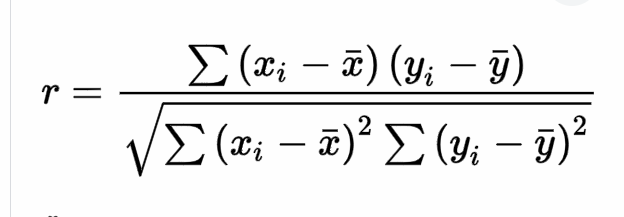

In [ ]:
# way 1 : rsquare is a square of Correlation.
# corrlation (r)
age = np.array(age)
inc = np.array(income)
# mean of age
mage = age.mean()
# mean of income
minc = inc.mean()
# deviation of age
dage = age - mage
# deviation of income
dinc = inc - minc
# element to element multiplication of dage and dinc
emul = dage * dinc
# sum of emul
num = emul.sum()
# square of  dage (each element)
dsage = dage ** 2
# sum of squares of dage
sqage = dsage.sum()
# square of dinc
dsinc = dinc ** 2
# sum of squares of dinc
sqinc = dsinc.sum()
den = (sqage * sqinc)**0.5
r = num/den
print(r)





0.9898327569341583


In [ ]:
# way1 : rsquare is square of correlation.
rsquare = r*r
rsquare

0.9797688866998765

In [ ]:
#predicted values have 97% variance with actual values.


In [ ]:
# 2nd way  to find Rsquare . (simple way)
# rsquare = 1 - (rss/tss)
# rss --> sum of residuals squares
# residual --> residual error --> difference between y and ycap--> y-ycap
# tss --> sum of deviations squares.
# deviation --> difference between   y and ymean --> y-ymean





In [ ]:
rss =  ((Y-ycap)**2).sum()
tss = ((Y-Y.mean())**2).sum()
rsquare = 1 - (rss/tss)
print("Accuracy ", rsquare)


Accuracy  0.9797688866998766


In [ ]:
# 97% of predicted values are close to actual values

In [ ]:
# function  for to find Weights.

def  weights(x, y):
    from numpy.linalg import inv
    left = inv(X.T.dot(X))
    right = X.T.dot(Y)
    return left.dot(right)


In [ ]:
W = weights(X, Y)
W

array([[5.89813375],
       [1.88180404]])

In [ ]:
# function for Linear regression predict.
def predict(x, w):
    return x.dot(w)
ycap = predict(X, W)
ycap

array([[43.53421462],
       [62.35225505],
       [52.94323484],
       [47.29782271],
       [81.17029549],
       [66.11586314],
       [71.76127527],
       [54.82503888]])

In [ ]:
# function for correlation
def corr(x, y):
    mx = x.mean()
    my = y.mean()
    dx = x-mx
    dy = y-my
    dxy = dx * dy
    num = dxy.sum()
    dleft =  (dx**2).sum()
    dright = (dy**2).sum()
    den = (dleft*dright)**0.5
    return num/den


In [ ]:
corr(age, inc)

0.9898327569341583

In [ ]:
corr(Y, ycap)

0.9898327569341582

In [ ]:
def rsquare(y, ycap):
    return corr(y, ycap)**2
rsquare(Y, ycap)

0.9797688866998763

In [ ]:
# way 2 of rsqure.
def rsquare(y, ycap):
  rss =  ((y-ycap)**2).sum()
  tss =  ((y-y.mean())**2).sum()
  return 1 - (rss/tss)


In [ ]:
rsquare(Y, ycap)

0.9797688866998766

In [ ]:
def accuracy(y, ycap):
   return round(rsquare(Y, ycap)*100, 2)


In [ ]:
accuracy(Y, ycap)

97.98

In [ ]:
# Build the model with above functions.

In [ ]:
W = weights(X, Y)
ycap = predict(X, W)
print("Accuracy ", accuracy(Y, ycap))

Accuracy  97.98


In [ ]:
# new data
new_age = [30, 25, 40]


In [ ]:
# predictable matrix.
ones_new = np.ones(len(new_age))
P = np.c_[ones_new, new_age]
P

array([[ 1., 30.],
       [ 1., 25.],
       [ 1., 40.]])

In [ ]:
predicted_income = predict(P, W)  # (3,2).(2, 1)--> (3, 1)
predicted_income

array([[62.35225505],
       [52.94323484],
       [81.17029549]])

In [ ]:
np.c_[new_age, predicted_income]

array([[30.        , 62.35225505],
       [25.        , 52.94323484],
       [40.        , 81.17029549]])

In [ ]:
# learning Summary.
# Linear regression in statistical style.
# how to find Weights.
# what weights contains -->intercept and slopes
# how to apply prediction
# performance measurement (quality check) of predictions
# what is Rsquare ?
# Two ways to find Rsquare 1. Square of Correlation 2. 1-(rss/tss)
# rss --> sum of residual squares
# what is residual --> difference between actual target and predicted .
# tss --> total sum of square. --> sum of squares of deviation
# deviation --> differece between actual and its mean.
# develop functions for all above
# how to apply predictions on new data with build model.

